In [14]:
import pandas as pd

## Application record

In [15]:
application_record = pd.read_csv("application_record.csv")
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [16]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [19]:
application_record["OCCUPATION_TYPE"].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [20]:
application_record[application_record["OCCUPATION_TYPE"].isnull()]["NAME_INCOME_TYPE"].value_counts() 
#vemos que los valores nulos son nulos porqué no se sabe a qué se dedican, no porqué no trabajen

Pensioner               75357
Working                 35886
Commercial associate    16745
State servant            6210
Student                     5
Name: NAME_INCOME_TYPE, dtype: int64

In [21]:
application_record[application_record["OCCUPATION_TYPE"].isnull()]["AMT_INCOME_TOTAL"].value_counts().sort_index() #confirmado todos trabajan o cobran una pensión

26100.0       2
27000.0      16
27900.0       1
28350.0       2
28800.0       3
             ..
945000.0      6
990000.0      4
1125000.0     1
1260000.0     1
1575000.0     4
Name: AMT_INCOME_TOTAL, Length: 498, dtype: int64

In [22]:
#habría que pasar days birth a fecha de nacimiento (to datetime) y days employed a fecha de contratación/años trabajados
# habria que eliminar la columna movil, ya que todos tienen. 

In [23]:
columns = application_record.columns.to_list()

In [25]:
for column in columns: 
    print(application_record[column].value_counts())

7603224    2
7742853    2
7836711    2
7091721    2
7022327    2
          ..
5372264    1
6412652    1
6410605    1
6367602    1
6291456    1
Name: ID, Length: 438510, dtype: int64
F    294440
M    144117
Name: CODE_GENDER, dtype: int64
N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64
Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64
135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
300600.0        1
621000.0        1
109899.0        1
283185.0        1
83304.0         1
Name: AMT_INCOME_TOTAL, Length: 866, dtype: int64
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / seco

In [7]:
import seaborn as sns

In [10]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,8

<AxesSubplot:>

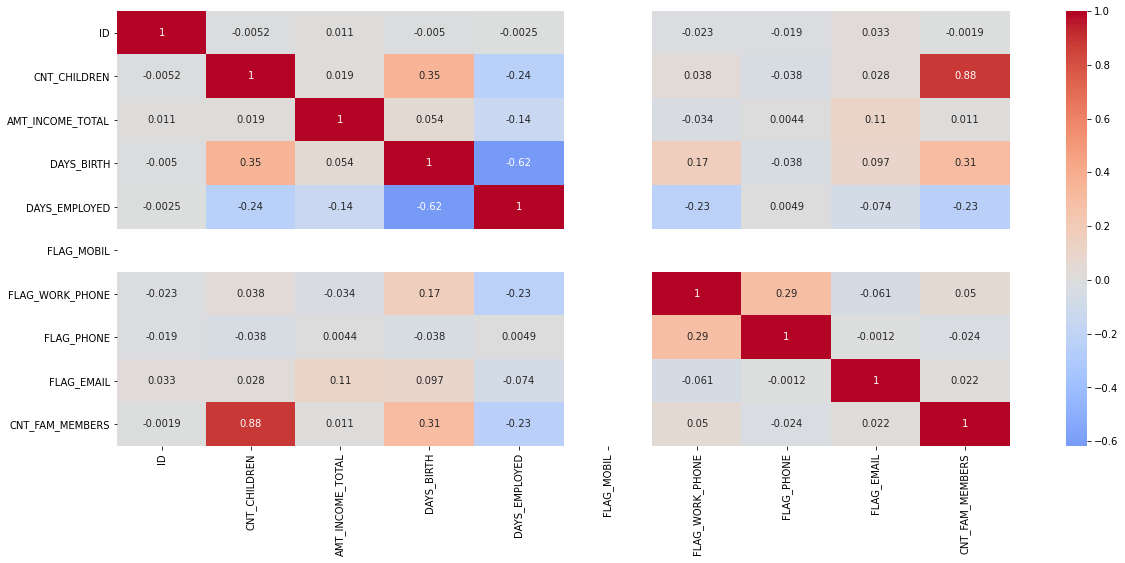

In [12]:
sns.heatmap(application_record.select_dtypes(include=np.number).corr(), center=0, cmap = "coolwarm", annot = True) 
#parece que la cantidad de hijos y la cantidad de miembros de la familia está muy correlacionado
# también está correlacionado, pero a la inversa, el número de dias employed con la edad

## Credit Record

In [18]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [17]:
credit_record = pd.read_csv("credit_record.csv")
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [28]:
len(credit_record["ID"].unique())

45985

In [31]:
len(application_record["ID"].unique())

438510

In [125]:
df = pd.DataFrame(credit_record["ID"].value_counts()).reset_index()
df

,index,ID
0,5145767,61
1,5116236,61
2,5037153,61
3,5002523,61
4,5028973,61
...,...,...
45980,5149044,1
45981,5079047,1
45982,5137258,1
45983,5023604,1


In [148]:
df["ID"].value_counts().sort_index().head(20)

1      399
2     1088
3     1163
4     1339
5     1227
6     1439
7     1457
8     1531
9     1421
10    1300
11    1347
12    1356
13    1337
14    1172
15    1132
16    1115
17    1115
18    1112
19    1026
20     980
Name: ID, dtype: int64

In [135]:
credit_record[credit_record["ID"] == 5149044]

,ID,MONTHS_BALANCE,STATUS
1027268,5149044,0,0


In [113]:
credit_record_new = pd.DataFrame(credit_record.groupby(['ID','STATUS'])["MONTHS_BALANCE"].count()).reset_index().pivot(index="ID", columns="STATUS", values="MONTHS_BALANCE").reset_index()
credit_record_new

STATUS,ID,0,1,2,3,4,5,C,X
0,5001711,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,5001712,10.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN
2,5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
3,5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
4,5001715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
...,...,...,...,...,...,...,...,...,...
45980,5150482,12.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN
45981,5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
45982,5150484,12.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
45983,5150485,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
joined_df = pd.merge(application_record, credit_record_new, on ='ID', how ='inner')
joined_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,0,1,2,3,4,5,C,X
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,13.0,1.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,12.0,1.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2.0,7.0,NaN,NaN,NaN,NaN,NaN,7.0,16.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,Managers,2.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,8.0
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,Medicine staff,2.0,1.0,7.0,2.0,1.0,1.0,7.0,5.0,NaN
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,Medicine staff,2.0,1.0,7.0,2.0,1.0,1.0,7.0,14.0,NaN
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,Sales staff,2.0,8.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [115]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 